## App Reviews Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
reviews = pd.read_csv('linkedin-reviews.csv')


In [4]:
reviews

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [5]:
reviews.columns

Index(['Review', 'Rating'], dtype='object')

In [8]:
reviews['Rating'].value_counts()

1    275
4    122
3    121
5     95
2     89
Name: Rating, dtype: int64

#### Exploratory Data Analysis

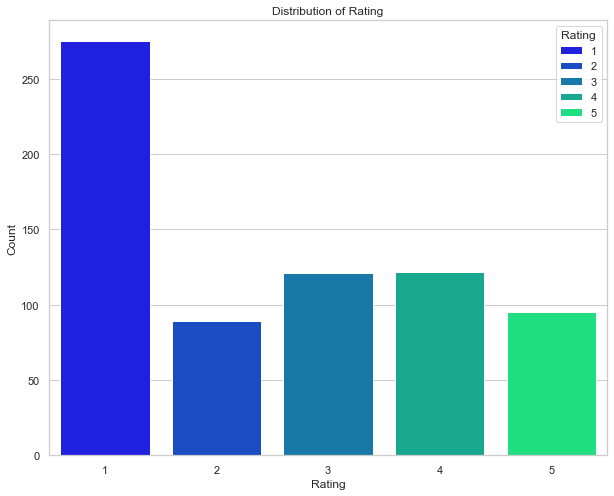

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))
sns.countplot(data=reviews,x='Rating',hue='Rating',palette='winter')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [14]:
rev_len = reviews['Review'].apply(len)


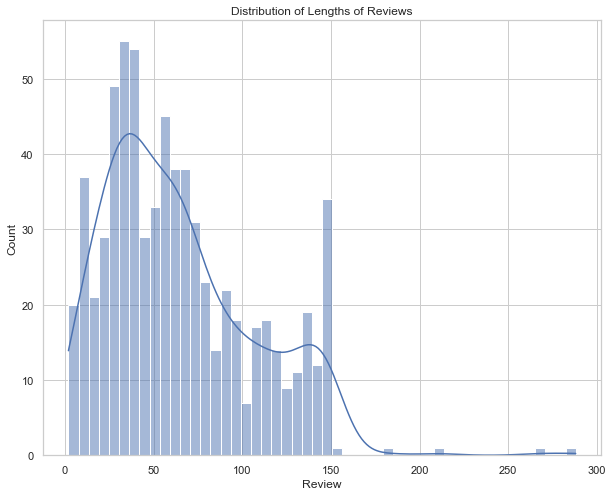

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(rev_len,bins=50,kde=True)
plt.title('Distribution of Lengths of Reviews')
plt.show()

In [24]:
from textblob import TextBlob

In [25]:
def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [26]:
reviews['sentiment'] = reviews['Review'].apply(textblob_sentiment_analysis)

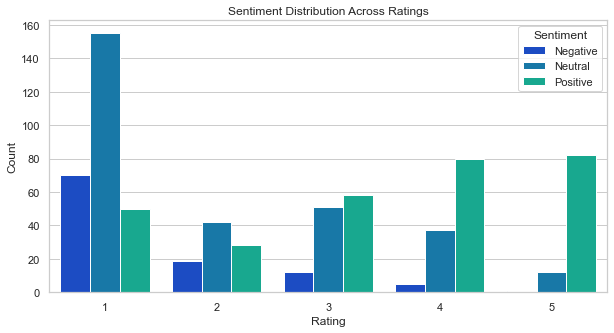

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(data=reviews, x='Rating', hue='sentiment',palette='winter')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [33]:
from wordcloud import WordCloud

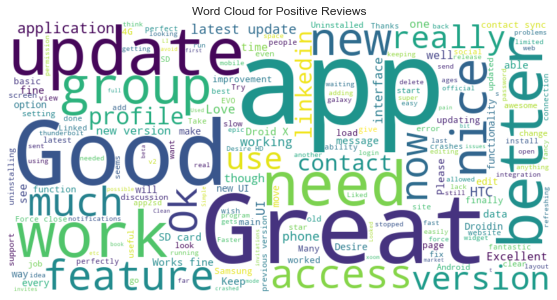

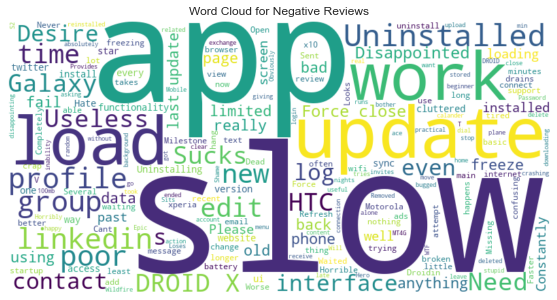

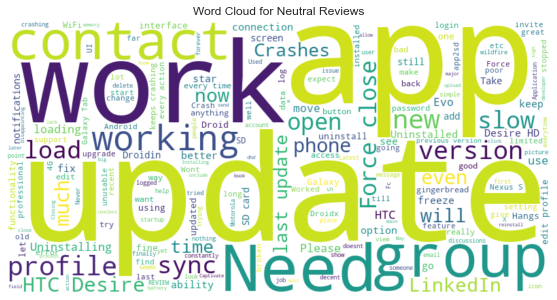

In [35]:
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in reviews[reviews['sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

### Summary

Analysis of Text Data Follows, Extracting text from Web ,Performing cleaning,eda, tokenize,word embedding etc.. For basic lookover is this notebook on textual Feedbacks.